# Master 2 High Performance Computing and Simulation

## Members : lougani faouzi ,hery Andrianantenaina

## Report of module Data & Apprentissage TD2




## Introduction : 

This file contains our solutions for the different exercises that we have solved.
The work of these exercises has been shared between the two members of the group, so that we can discuss the problematic and seek together the solution of each exercise.

we used a git repository to version our progress: 
https://github.com/lougani-faouzi/DA

# Exercice 1.

In Section 2.5 of the book "[The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12_toc.pdf)", by Trevor Hastie, Robert Tibshirani, Jerome Friedman, there is a mention about the effects of the *curse of dimensionality*. Read the section and write the code implementations that reproduce and verify all the experiments shown in the Figures 2.6 to 2.9.

* Figure 2.6

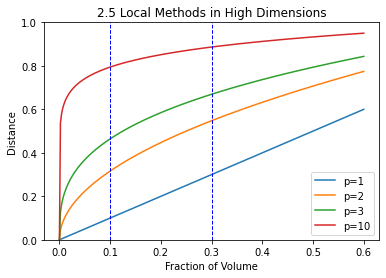

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,0.6,300)
y1 = pow(x,1)
y2 = pow(x,1/2)
y3 = pow(x,1/3)
y4 = pow(x,1/10)
plt.plot(x,y1,label="p=1")
plt.plot(x,y2,label="p=2")
plt.plot(x,y3,label="p=3")
plt.plot(x,y4,label="p=10")
plt.axvline(x=0.1,color='b',linestyle='--',lw = "1")
plt.axvline(x=0.3,color='b',linestyle='--',lw = "1")
plt.legend()
plt.ylim([0,1])
plt.ylabel("Distance")
plt.xlabel("Fraction of Volume")
plt.title("2.5 Local Methods in High Dimensions")


plt.show()

 * Figure 8

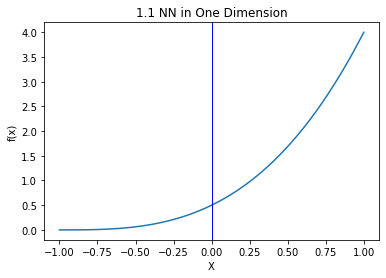

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,300)
#x=range(0,10)
#x=[-1,-0.8,-0.6,-0.4,-0.2,0]
y = 0.5*pow((x+1),3)
plt.plot(x,y)
plt.axvline(x=0,color='b',lw = "1")

plt.ylabel("f(x)")
plt.xlabel("X")
plt.title("1.1 NN in One Dimension")

plt.show()

# Exercice 2.
**a)** Compare the performance of LOOCV with 5-fold CV.

For our tests we downloaded the sonar.csv file from: https://datahub.io/machine-learning/sonar#pandas
and we save it locally on the same folder of our work


In [2]:
# a. Comparaison of LOOCV and 5-fold CV : ---------------------------------
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.ensemble import RandomForestClassifier

# load dataset
url = './sonar.csv'
dataframe = read_csv(url, skiprows=[1])
data = dataframe.values

n_samples = len(data)
#print(n_samples)
# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]

# create loocv procedure
cvLOOCV = LeaveOneOut()

# create model
model = RandomForestClassifier(random_state=1)

# evaluate model
loocv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cvLOOCV, n_jobs=-1)
k_foldcv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1)

# report performance
print('Perfor report  :')
print('The accuracy for LOOCV     : %.3f (%.3f)' % (mean(loocv_scores), std(loocv_scores)))
print('The accuracy for 5-fold CV : %.3f (%.3f)' % (mean(k_foldcv_scores), std(k_foldcv_scores)))

Perfor report  :
The accuracy for LOOCV     : 0.836 (0.371)
The accuracy for 5-fold CV : 0.716 (0.141)


**b)** Investigate the effect of the size of data to the comparison. Specifically run (a) with 25%, 50%, and 75% of the data.

In [3]:
# b. effect of the size data to the comparison :
n_samples = len(data)
X1, y1 = X[:int(.25 * n_samples)], y[:int(.25 * n_samples)]  # 25% 
X2, y2 = X[:int(.50 * n_samples)], y[:int(.50 * n_samples)]  # 50%
X3, y3 = X[:int(.75 * n_samples)], y[:int(.75 * n_samples)]  # 75%

# create loocv procedure
cvLOOCV = LeaveOneOut()

# create model
model = RandomForestClassifier(random_state=1)
# evaluate models across different length of data : 
# 25% of the original data : -----------------------------------------------------------------------------
loocv_scores_1 = cross_val_score(model, X1, y1, scoring='accuracy', cv=cvLOOCV, n_jobs=-1)
kfold_scores_1 = cross_val_score(model, X1, y1, scoring='accuracy', cv=5, n_jobs=-1)

# 50% of the original data : -----------------------------------------------------------------------------
loocv_scores_2 = cross_val_score(model, X2, y2, scoring='accuracy', cv=cvLOOCV, n_jobs=-1)
kfold_scores_2 = cross_val_score(model, X2, y2, scoring='accuracy', cv=5, n_jobs=-1)

# 75% of the original data : -----------------------------------------------------------------------------
loocv_scores_3 = cross_val_score(model, X3, y3, scoring='accuracy', cv=cvLOOCV, n_jobs=-1)
kfold_scores_3 = cross_val_score(model, X3, y3, scoring='accuracy', cv=5, n_jobs=-1)

# report performance
print('Perfor report  ')

print('---25% of original data -----------------------------------')
print('Accuracy for LOOCV         : %.3f (%.3f)' % (mean(loocv_scores_1), std(loocv_scores_1)))
print('Accuracy for 5-fold CV     : %.3f (%.3f)' % (mean(kfold_scores_1), std(kfold_scores_1)))

print('---50% of original data -----------------------------------')
print('Accuracy for LOOCV         : %.3f (%.3f)' % (mean(loocv_scores_2), std(loocv_scores_2)))
print('Accuracy for 5-fold CV     : %.3f (%.3f)' % (mean(kfold_scores_2), std(kfold_scores_2)))

print('---75% of original data -----------------------------------')
print('Accuracy for LOOCV         : %.3f (%.3f)' % (mean(loocv_scores_3), std(loocv_scores_3)))
print('Accuracy for 5-fold CV     : %.3f (%.3f)' % (mean(kfold_scores_3), std(kfold_scores_3)))


Perfor report  
---25% of original data -----------------------------------
Accuracy for LOOCV         : 1.000 (0.000)
Accuracy for 5-fold CV     : 1.000 (0.000)
---50% of original data -----------------------------------
Accuracy for LOOCV         : 0.932 (0.252)
Accuracy for 5-fold CV     : 0.923 (0.022)
---75% of original data -----------------------------------
Accuracy for LOOCV         : 0.852 (0.355)
Accuracy for 5-fold CV     : 0.748 (0.130)


**c)** Investigate the effect of having one small data class to the comparison. Specifically, consider that you have only a portion of the one of the classes: 25%, 50%, or 75%, and apply the training-evaluation procedure with CV.

In [18]:

from sklearn.model_selection import cross_validate

for n in (5, 10, 15, 20, 25, 30):
    
    scores = cross_validate(model, X1, y1, scoring='precision_macro', cv=n, return_estimator=True)
    sorted(scores.keys())
   
    print('----------------------------------------')
    print('score_time    for %d fold CV    : %.3f' % (n, mean(scores['score_time'])))
    print('mean fit time for %d fold CV    : %.3f' % (n, mean(scores['fit_time'])))  
print('----------------------------------------')
print('----------------------------------------')
print('Direct application:')
scores_ = cross_validate(model, X1, y1, scoring='precision_macro', cv=30, return_estimator=True)
print('score_time for 30 fold CV %.3f'  % mean(scores_['score_time']))
print('score_time for 30 fold CV %.3f'  % mean(scores_['fit_time']))


----------------------------------------
score_time    for 5 fold CV    : 0.013
mean fit time for 5 fold CV    : 0.134
----------------------------------------
score_time    for 10 fold CV    : 0.013
mean fit time for 10 fold CV    : 0.133
----------------------------------------
score_time    for 15 fold CV    : 0.013
mean fit time for 15 fold CV    : 0.133
----------------------------------------
score_time    for 20 fold CV    : 0.013
mean fit time for 20 fold CV    : 0.127
----------------------------------------
score_time    for 25 fold CV    : 0.013
mean fit time for 25 fold CV    : 0.131
----------------------------------------
score_time    for 30 fold CV    : 0.014
mean fit time for 30 fold CV    : 0.133
----------------------------------------
----------------------------------------
Direct application:
score_time for 30 fold CV 0.014
score_time for 30 fold CV 0.133


### Results : 
* if we have one small data set LOOCV performs well, 5-fold CV gives nearly the same performance results
* we can  see that  LOOCV and 5-folds have the same performance with a small dataset .(LOOCV in a little bit better) 
* Applying CV and increasing the number of subsets (k) don't affect really the performance positivelly
* if we have a small data set LOOCV si better to do our cross-validation as we will get best performance metrics,to resume when we have large amount of training data, k-fold cross validation can be more efficient, because if we take LOOCV instead there will be too many iterations to perform the evaluation.

# Exercice 3

**a)** Give a meaningful definition of what an "outlier" could be in this situation. What would be the modifications needed to be done to the original density-based method in order to be relevant in this case?
   * To interpret what could be an outlier in such kind of data (time-series data), we can look for example at music recognition (or sound recognition in general) in situations when we search to identify the artist, a set of instruments, or also if we cant to remove or reduce noises in the music, in finance for example when we seek the anomalies in same transactions.., so it could represent noises, anomalies, special behavious in the dignal..
   * It could be a good idea to use the frequency-domain representation of data to simplify their analysis.


**b)** Construct a synthetic 2D signal with parametrized proportion of outliers (like the exercises we saw in Lab6) and demonstrate the application of a LOF-based solution.  
* In this application we are going to fit our model to a set of random data to detect the outliers, using LOF model which is an unsupervised model based on the measures of densities of each object with respect to their neighbors.

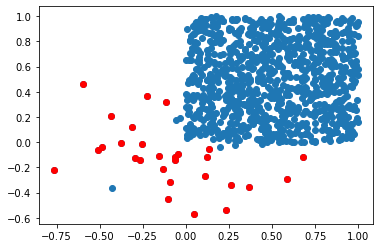

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

N_samples = 1000
N_outliers = 50

data = np.random.random((N_samples,2))
#print(data)

X, y = data[:, :-1], data[:, -1]

#print(X.type)

# Add outlier data
np.random.seed(0)
X[:N_outliers] = 0.3 * np.random.normal(size=(N_outliers, 1))
y[:N_outliers] = -0.3 * np.random.normal(size=N_outliers)


#plt.scatter(X, y, color='yellowgreen', marker='.', label='Inliers')

# model specification
model = LocalOutlierFactor(n_neighbors = 20, metric='manhattan')

# model fitting
y_pred = model.fit_predict(data)

index = np.where(y_pred == -1)
values = data[index]

#model.negative_outlier_factor_

plt.scatter(X, y)
#plt.scatter(X[:N_outliers], y[:N_outliers], color='yellow', marker='.', label='Inliers')

plt.scatter(values[:,0],values[:,1], color='r')  # Outliers
plt.show()

# Exercice 4

**a)** You will need a piece of code implementing the GMM training with a fixed $k$ using the EM algorithm.


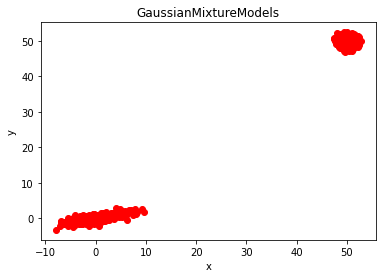

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal

k=2 #defining the fixed k
data_size=350 #defining data size 

class GMM(object):
    #define constructor 
    def __init__(self,K):
        self.c = 0.1
        self.f = 2    
        self.K = K 
        multi = np.zeros((self.K, self.f))
        self.L = 1e-2
    #this function affects parameters by using kmeans model 
    def init2(self):
        kmeans = KMeans(self.K).fit(self.X)
        multi = kmeans.cluster_centers_
        v = np.zeros((self.K, self.f, self.f))
        for j in range(self.K):
            v[j] = np.eye(self.f)
        self.v = v 
        self.multi = multi
        self.pi = np.ones(self.K)/self.K
    #here we apply using our EM algorithm 
    def apply(self,X):
        self.cout = []
        self.X = X
        self.lenght = len(X)
        #init parameters 
        self.init2()
        while True:
            temp = np.zeros((self.lenght, self.K))
            for k in range(self.K):
                for n in range(self.lenght):
                    temp[n,k] = self.pi[k] * multivariate_normal.pdf(self.X[n], self.multi[k], self.v[k])
            cout_app = np.log(temp.sum(axis=1)).sum()
            temp = temp / temp.sum(axis=1, keepdims=True)
            self.temp = temp
            for j in range(self.K):
                xx = self.temp[:,j].sum()
                self.pi[j] = xx / self.lenght
                yy = self.temp[:,j].dot(self.X)/xx
                self.multi[j] = yy
                d = self.X - yy
                temp2 = np.expand_dims(self.temp[:,j], -1) * d
                self.v[j] = temp2.T.dot(d) / xx + np.eye(self.f)*self.L
            self.cout.append(cout_app)
            cc=len(self.cout)
            if  cc > 2 and np.abs(self.cout[-2] - self.cout[-1]) < self.c :
                    break        
        plt.scatter(self.X[:,0], self.X[:,1], c="r")
        plt.title("GaussianMixtureModels")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
        
N1=0.7
np.random.seed(0)
d1 = np.array([50, 50])+np.random.randn(data_size, 2) 
val = np.array([[0.0, -N1], [3.5, N1]])
d2 = np.dot(np.random.randn(data_size, 2), val)
# concatenate the two datasets d1 witch generates spherical data and d2  
# Which generates stretched Gaussian data 
train_v = np.vstack([d1, d2])
model = GMM(k)
model.apply(train_v)

### Comments  and conclusion:
* Here we see how compare GMM with k-Means
* we can deduce that EM is not trivial, and we need to identify the right number of components in the GMMs.
* EM depends on the initialization that we make before starting our applying method 

**f)** Construct a random synthetic dataset as follows. Consider a 5-by-5 2D grid arrangement of 25 clusters: i.e. the mean of the 1st cluster will be at (0,5), the 2nd at (1,5),..., the 6th at (0,4),..., the 25th at (5,0)). Each cluster will have $N=50$ points in 2D generated by a Gaussian distribution, with fixed $\sigma$ for all clusters (test values $\sigma = ${0.1, 0.5, 0.7, 1}). Run experiments with all your implementations (i.e. flat GMM training with fixed $k$; incremental GMM training with bisecting splits; incremental GMM training based on the global principle. Provide summaries of results about the clustering error and detailed comments with your observations/interpretations about the performance of the methods.

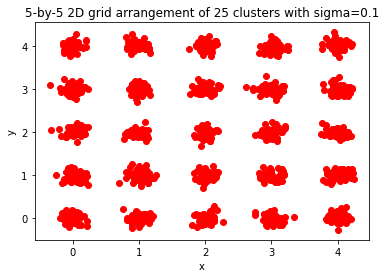

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math

grid_size = 5   # size fo the grid 
Dim = 2         # dimension 
nbr_cluster = 25  # number of clusters 
N = 50          # N points in 2D generated by a Gaussian distribution,
sigma = 0.1     # value of 𝜎=0.1
cpt = 0.0

# here we generate our centroids
centroids = np.zeros(0)
for i in range(grid_size):
    for j in range(grid_size):
        centroids = np.append(centroids, [i, j])
centroids = centroids.reshape(nbr_cluster, Dim)
# here we generate our data
temp = np.zeros(0)
for i in range(nbr_cluster):
    data = np.random.normal(cpt, sigma, N*Dim)
    data[::2] += centroids[i][0] 
    data[1::2] += centroids[i][1] 
    temp = np.append(temp, data)
temp = temp.reshape(nbr_cluster *N, Dim)
#plot results 
plt.scatter(temp[:, 0], temp[:, 1],color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("5-by-5 2D grid arrangement of 25 clusters with sigma=0.1")
plt.show()




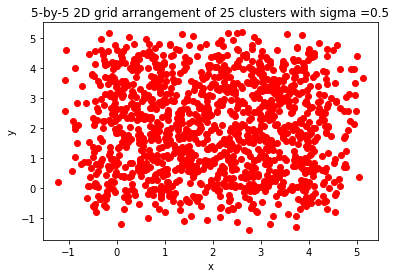

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

grid_size = 5   # size fo the grid 
Dim = 2         # dimension 
nbr_cluster = 25  # number of clusters 
N = 50          # N points in 2D generated by a Gaussian distribution,
sigma = 0.5     # value of 𝜎=0.5 
cpt = 0.0

# here we generate our centroids
centroids = np.zeros(0)
for i in range(grid_size):
    for j in range(grid_size):
        centroids = np.append(centroids, [i, j])
centroids = centroids.reshape(nbr_cluster, Dim)
# here we generate our data
temp = np.zeros(0)
for i in range(nbr_cluster):
    data = np.random.normal(cpt, sigma, N*Dim)
    data[::2] += centroids[i][0] 
    data[1::2] += centroids[i][1] 
    temp = np.append(temp, data)
temp = temp.reshape(nbr_cluster *N, Dim)
#plot results 
plt.scatter(temp[:, 0], temp[:, 1],color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("5-by-5 2D grid arrangement of 25 clusters with sigma =0.5")
plt.show()




### Comments  and conclusion:

Here to do our cluster performance evaluation, we study :
* The mean distance between a sample and all other points in the same cluster.
* The mean distance between a sample and all other points in the next nearst cluster

**RESULT1:** If we apply the two points ,The first figure turns out that we get the best score with five clusters. with sigma =0.1

**RESULT2:** when we increase this value (0.5.....1), all configurations give more clustering error, we can see that the data well exceed the size of the grid cells as shown in the second figure 

We can say that the good configuration, which takes in account both of **the amount of information included** (=biggest possible number of clusters) and on **the stability of the fitting procedure** (=lowest possible Gaussian Mixture Model GMMs distance), is the one which considers  5 clusters.

The GMM is a good model to cluster our data if that the fitting procedure  is good.

Here we know **k** the right number of clusters, but this could not be the optimal choice all time. And it turns out that actually it was not for my specific issue.